# Model based on Polarity

In [3]:
pip install sklearn

  Preparing metadata (setup.py): started
Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2959 sha256=cafe9ebada95437946191e9ee9773c3b05e9c4519f2e8a9f306d9227b8ec3855
  Stored in directory: c:\users\sparrow\appdata\local\pip\cache\wheels\f8\e0\3d\9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [52]:
import pandas as pd
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn import tree
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
polarity = pd.read_csv('../data/polarity')
word_count = pd.read_csv('../data/word_count')

In [3]:
polarity.head()

,Unnamed: 0,author,subreddit,selftext,title,when,neg,neu,pos,compound
0,0,TaintedOne88,relationship_advice,i just text this man telling him how i felt ab...,A permanent memory,2022-11-24 00:15:02,0.000,0.854,0.146,0.8555
1,1,UncommonCow56,relationship_advice,ok so a the title say my (m18) girlfriend (f20...,My (M18) gf (F20) keeps dog sitting for a “fri...,2022-11-24 00:13:16,0.075,0.854,0.071,-0.5550
2,2,darkglassoverwater,relationship_advice,i'm a junior in high school (male). i have a l...,Friendzone or does she like me?,2022-11-24 00:13:06,0.089,0.726,0.185,0.9800
3,3,YourAverageThinker,relationship_advice,me and this girl used to talk at the beginning...,Girl (21F) is so confusing I (M21) just don’t ...,2022-11-24 00:12:56,0.075,0.709,0.217,0.9974
4,4,Illustrious-Ask1708,relationship_advice,i've been seeing this girl who's a the title s...,What's everyone's thoughts on an 18yr old fema...,2022-11-24 00:10:58,0.000,0.933,0.067,0.4380


In [36]:
polarity.tail()

,author,subreddit,selftext,title,when,neg,neu,pos,compound
12883,comradeshin,AmItheAsshole,my boyfriend's best friend (adam) is (reluctan...,"AITA for ""ruining a birthday"" because my boyfr...",2022-11-15 08:59:29,0.113,0.716,0.171,0.9905
12884,LeMaskedUnicorn,AmItheAsshole,okay let me start off by saying i'm a 20 year ...,AITA my job sucks and I'm tired,2022-11-15 08:57:27,0.059,0.902,0.039,-0.6780
12885,PlentyBootz,AmItheAsshole,pretty much i only had one other roommate befo...,AITA For moving my roommate's laundry without ...,2022-11-15 08:47:09,0.140,0.786,0.074,-0.9581
12886,Savings-Invite974,AmItheAsshole,i’m a college student and agreed to live in a ...,AITA for wanting to re spin the wheel for room...,2022-11-15 08:45:47,0.050,0.890,0.060,0.0900
12887,Ill-Watercress-5632,AmItheAsshole,a few month ago i (m34) had just gone through ...,AITA for bailing on my sister's wedding?,2022-11-15 08:45:43,0.123,0.805,0.072,-0.9821


In [4]:
polarity.drop(columns='Unnamed: 0', inplace=True)	

In [5]:
X = polarity[['neg','neu','pos','compound']]
y = polarity['subreddit']

In [6]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=20)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9021, 4)
(3867, 4)
(9021,)
(3867,)


# Baseline with Dummy Classifier

In [8]:
dc = DummyClassifier()

In [10]:
dc.fit(X,y)

DummyClassifier()

In [11]:
dc.score(X_train,y_train)

0.5241104090455604

In [12]:
dc.score(X_test,y_test)

0.5376260667183863

In [37]:
predictions_dc = dc.predict(X_test)

{'Accuracy': 0.5376260667183863, 'Precision': 0.0, 'Sensitivity_recall': 0.0, 'Specificity': 0.0, 'F1_score': 0.0}


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


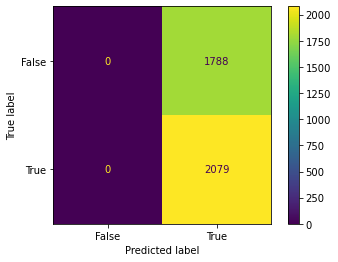

In [49]:
cm = confusion_matrix(y_test, predictions_dc, labels=dc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[False,True])
disp.plot();
Accuracy = metrics.accuracy_score(y_test, predictions_dc)
Precision = metrics.precision_score(y_test, predictions_dc, pos_label='AmItheAsshole',)
Sensitivity_recall = metrics.recall_score(y_test, predictions_dc, pos_label='AmItheAsshole',)
Specificity = metrics.recall_score(y_test, predictions_dc, pos_label= 'AmItheAsshole',)
F1_score = metrics.f1_score(y_test, predictions_dc,pos_label='AmItheAsshole',)
print({"Accuracy":Accuracy,
       "Precision":Precision,
       "Sensitivity_recall":Sensitivity_recall,
       "Specificity":Specificity,
       "F1_score":F1_score})

# Logistic Regression

In [13]:
logreg = LogisticRegression()

In [14]:
logreg.fit(X,y)

LogisticRegression()

In [15]:
logreg.score(X_train,y_train)

0.6352954217935928

In [16]:
logreg.score(X_test,y_test)

0.6343418670804241

In [39]:
predictions_logreg = logreg.predict(X_test)

{'Accuracy': 0.6343418670804241, 'Precision': 0.6077188940092166, 'Sensitivity_recall': 0.5900447427293065, 'Specificity': 0.5900447427293065, 'F1_score': 0.5987514188422248}


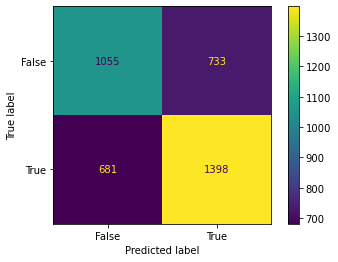

In [48]:
cm = confusion_matrix(y_test, predictions_logreg, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[False,True])
disp.plot();
Accuracy = metrics.accuracy_score(y_test, predictions_logreg)
Precision = metrics.precision_score(y_test, predictions_logreg, pos_label='AmItheAsshole',)
Sensitivity_recall = metrics.recall_score(y_test, predictions_logreg, pos_label='AmItheAsshole',)
Specificity = metrics.recall_score(y_test, predictions_logreg, pos_label= 'AmItheAsshole',)
F1_score = metrics.f1_score(y_test, predictions_logreg,pos_label='AmItheAsshole',)
print({"Accuracy":Accuracy,
       "Precision":Precision,
       "Sensitivity_recall":Sensitivity_recall,
       "Specificity":Specificity,
       "F1_score":F1_score})

#  Gaussian Naive Bayes

In [17]:
gnb = GaussianNB()

In [18]:
gnb.fit(X,y)

GaussianNB()

In [19]:
gnb.score(X_train, y_train)

0.6415031592949784

In [20]:
gnb.score(X_test, y_test)

0.6389966382208431

In [40]:
predictions_gnb = gnb.predict(X_test)

{'Accuracy': 0.6389966382208431, 'Precision': 0.5904893813481071, 'Sensitivity_recall': 0.7153243847874721, 'Specificity': 0.7153243847874721, 'F1_score': 0.6469398077895803}


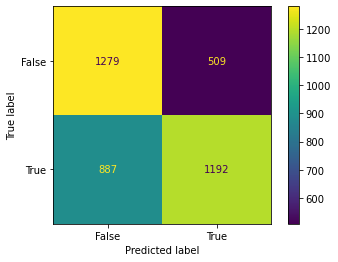

In [47]:
cm = confusion_matrix(y_test, predictions_gnb, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[False,True])
disp.plot();
Accuracy = metrics.accuracy_score(y_test, predictions_gnb)
Precision = metrics.precision_score(y_test, predictions_gnb, pos_label='AmItheAsshole',)
Sensitivity_recall = metrics.recall_score(y_test, predictions_gnb, pos_label='AmItheAsshole',)
Specificity = metrics.recall_score(y_test, predictions_gnb, pos_label= 'AmItheAsshole',)
F1_score = metrics.f1_score(y_test, predictions_gnb,pos_label='AmItheAsshole',)
print({"Accuracy":Accuracy,
       "Precision":Precision,
       "Sensitivity_recall":Sensitivity_recall,
       "Specificity":Specificity,
       "F1_score":F1_score})

# KNN

In [21]:
knn = KNeighborsClassifier()

In [22]:
knn.fit(X,y)

KNeighborsClassifier()

In [23]:
knn.score(X_train,y_train)

0.7567897128921406

In [24]:
knn.score(X_test, y_test)

0.7584690974915955

In [41]:
predictions_knn = knn.predict(X_test)

{'Accuracy': 0.7584690974915955, 'Precision': 0.7330786026200873, 'Sensitivity_recall': 0.7511185682326622, 'Specificity': 0.7511185682326622, 'F1_score': 0.741988950276243}


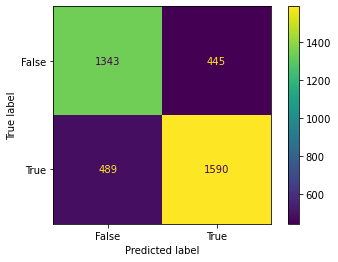

In [46]:
cm = confusion_matrix(y_test, predictions_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[False,True])
disp.plot();
Accuracy = metrics.accuracy_score(y_test, predictions_knn)
Precision = metrics.precision_score(y_test, predictions_knn, pos_label='AmItheAsshole',)
Sensitivity_recall = metrics.recall_score(y_test, predictions_knn, pos_label='AmItheAsshole',)
Specificity = metrics.recall_score(y_test, predictions_knn, pos_label= 'AmItheAsshole',)
F1_score = metrics.f1_score(y_test, predictions_knn,pos_label='AmItheAsshole',)
print({"Accuracy":Accuracy,
       "Precision":Precision,
       "Sensitivity_recall":Sensitivity_recall,
       "Specificity":Specificity,
       "F1_score":F1_score})